In [1]:
import numpy as np
from sklearn.preprocessing import normalize
import and_logic_generator as and_gen
import and_gate_pipeline as pipeline
import matplotlib.pyplot as plt

# reload modules every 2 seconds
%load_ext autoreload
%autoreload 2

In [2]:
# Repeatable seed
random_state = 2**12
np.random.seed(seed=random_state)


In [3]:
# Prepare samples
n = 2000
x, y = and_gen.generate_logistic_samples(n)
x = x - 0.5
x, x_norms = normalize(x, norm='l2', axis=0, return_norm=True)
shift = [[-0.5, -0.5]]

print('Norms:')
print(x_norms)

Norms:
[12.24950488 12.36597671]


In [4]:
and_gate_pipeline = pipeline.AndGatePipeline(x, y)
and_gate_pipeline.random_state = random_state


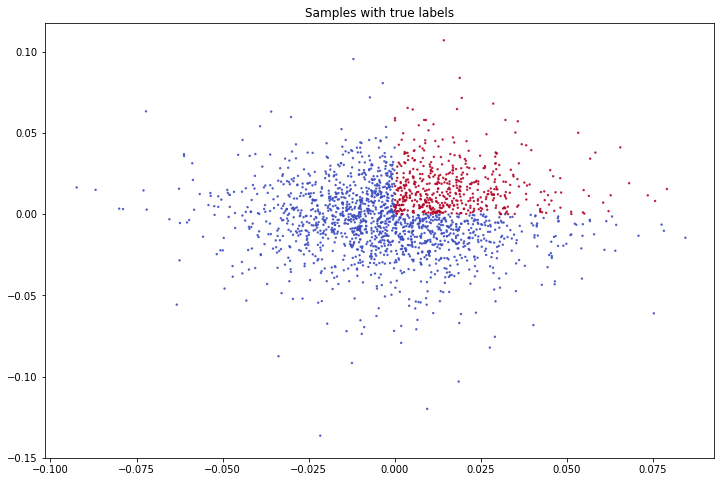

In [5]:
# Parameters for figures
figsize = np.array(plt.rcParams["figure.figsize"]) * 2
x_max = np.amax(x, axis=0) * 1.1
x_min = np.amin(x, axis=0) * 1.1

and_gate_pipeline.plot_data(
    figsize=figsize, xlim=[x_min[0], x_max[0]], ylim=[x_min[1], x_max[1]])


In [6]:
# 80:20 split on training and test sets
and_gate_pipeline.train_test_split(0.2)

Train test split: 0.80:0.20


In [7]:
# Parameters for SVM
gamma='scale'
C=1000

and_gate_pipeline.fit_svm_model(gamma=gamma, C=C, shift=shift, x_norms=[x_norms])


With gamma = scale and C = 1000
Accuracy on train set = 99.3750%
Accuracy on test set  = 99.0000%
Passed basic test


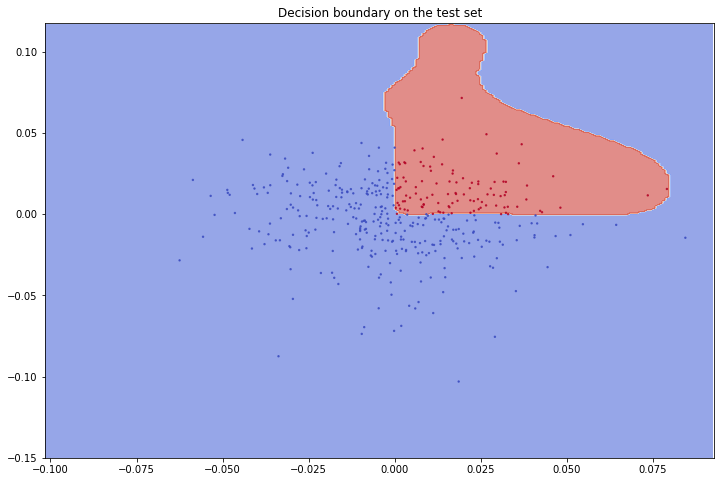

In [8]:
and_gate_pipeline.plot_prediction(
    figsize, h=0.001, 
    mesh_xlim=[x_min[0], x_max[0]], mesh_ylim=[x_min[1], x_max[1]], 
    xlim=[x_min[0], x_max[0]], ylim=[x_min[1], x_max[1]])


In [9]:
and_gate_pipeline.model.get_params()


{'C': 1000,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 4096,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [10]:
# Parameter for stepping size of Adversarial Examples
epsilon=0.0006 / np.average(x_norms)
print(f'epsilon={epsilon:.6f}')

and_gate_pipeline.generate_adversarial_examples(epsilon=epsilon)


epsilon=0.000049
Negative mean = [-0.0048, -0.0057]
Positive mean = [0.0169, 0.0173]
Completed after 2119 epoch...
Misclassified = 200
Misclassified negative = 36 (9.0000%)
Misclassified positive = 164 (41.0000%)
Found 200 Adversarial Examples out of 400. 50.0000% successful rate


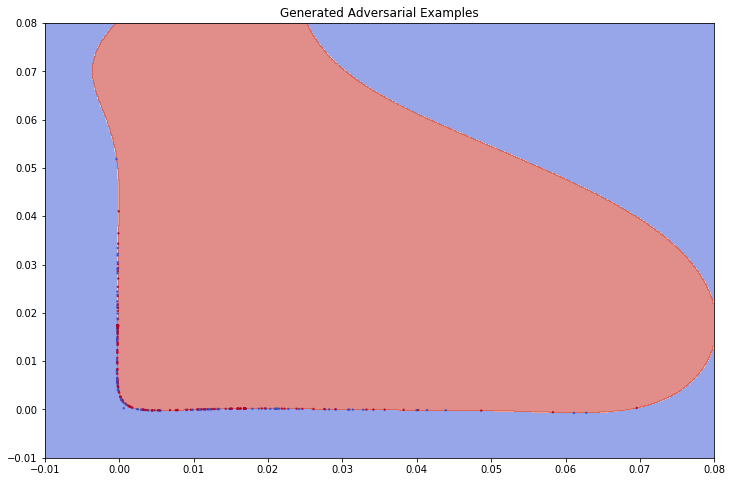

In [11]:
and_gate_pipeline.plot_adversarial_examples(
    figsize, h=0.0001,
    mesh_xlim=[-0.01, 0.08], mesh_ylim=[-0.01, 0.08],
    xlim=[-0.01, 0.08], ylim=[-0.01, 0.08])


In [12]:
# Parameters for Applicability Domain
k = 9
zeta0 = -0.1
zeta1 = -0.2

and_gate_pipeline.run_applicability_domain(zeta0=zeta0, zeta1=zeta1, k=k)



---------- Applicability ---------------
Pass rate = 100.0000%

---------- Reliability -----------------

In 0 class:
Threshold = 0.0030
Average mean = 0.0026
Passed indices:
1, 3, 6, 8, 12, 19, 24, 25, 30, 41, 42, 46, 51, 68, 70, 71, 75, 76, 92, 95, 99, 103, 109, 114, 121, 123, 132, 141, 142, 149, 150, 153, 154, 156, 157, 160, 163, 166, 167, 168, 176, 180, 182, 184, 186, 190, 202, 205, 217, 218, 225, 230, 231, 234, 241, 257, 269, 275, 278, 281, 291, 297, 299, 301, 303, 306, 309, 327, 329, 332, 338, 345, 351, 352, 355, 357, 375, 379, 384, 385, 393, 394

In 1 class:
Threshold = 0.0027
Average mean = 0.0027
Passed indices:
0, 5, 7, 9, 13, 14, 15, 21, 26, 28, 29, 32, 35, 36, 38, 43, 45, 47, 49, 52, 53, 56, 58, 59, 61, 62, 63, 64, 65, 67, 74, 77, 78, 79, 81, 86, 89, 91, 96, 97, 100, 101, 102, 105, 106, 112, 116, 117, 118, 119, 120, 122, 124, 135, 139, 140, 144, 145, 147, 152, 158, 159, 161, 164, 170, 171, 174, 175, 181, 183, 185, 187, 193, 194, 200, 207, 208, 209, 210, 215, 216, 219, 224,

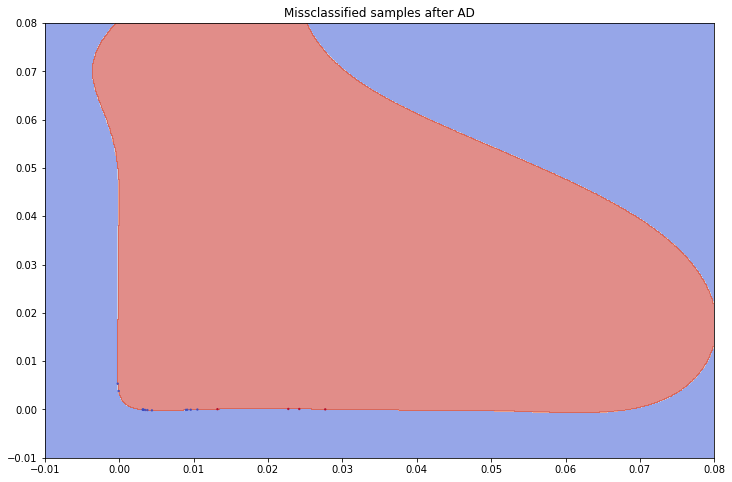

In [13]:
and_gate_pipeline.plot_after_ad(
    figsize, h=0.0001,
    mesh_xlim=[-0.01, 0.08], mesh_ylim=[-0.01, 0.08],
    xlim=[-0.01, 0.08], ylim=[-0.01, 0.08])